In [1]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import matplotlib.pyplot as plt

In [2]:
shapefile = "/home/mlopez/EXEC/Shapefiles/DDE_STF_20K_REG_FOR_VUE_S.shp"

In [3]:
#opening and transfering data into an array
ds = xr.open_dataset("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp45_tg_mean_annual.nc")

In [4]:
#opening and transfering data into an array
df = pcdf.load_as_df("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp45_tg_mean_annual.nc")

/exec/mlopez/Code/GitHub/processing_netcdf.py:24: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  index = ds.indexes['time'].to_datetimeindex()


In [5]:
df

tg_mean
lat       lon        time                  
66.623306 -89.045212 1950-01-01  260.484924
                     1951-01-01  259.078644
                     1952-01-01  258.677917
                     1953-01-01  257.989288
                     1954-01-01  259.059174
...                                     ...
40.041039 -74.045807 2096-01-01  287.475037
                     2097-01-01  288.044769
                     2098-01-01  286.913635
                     2099-01-01  288.436249
                     2100-01-01  287.527069

[11507106 rows x 1 columns]

In [6]:
dfC = df.copy()
dfC["tg_mean"] = dfC["tg_mean"] -273.15
dfC.head()

tg_mean
lat       lon        time                 
66.623306 -89.045212 1950-01-01 -12.665070
                     1951-01-01 -14.071350
                     1952-01-01 -14.472076
                     1953-01-01 -15.160706
                     1954-01-01 -14.090820

In [7]:
year_groups = {y:0 for y in range(1980,2011)}
year_groups.update({y:1 for y in range(2041,2071)})
year_groups.update({y:2 for y in range(2071,2101)})
dfC2 = dfC.reset_index()
dfp = dfC2.groupby([dfC2.time.dt.year.map(year_groups), "lat","lon"]).mean()
dfp

tg_mean
time lat       lon                  
0.0  40.041039 -89.045212  11.474038
               -88.961884  11.452959
               -88.878548  11.440704
               -88.795219  11.419402
               -88.711891  11.434692
...                              ...
2.0  66.623306 -61.629639  -6.771683
               -61.546310  -7.084950
               -61.462978  -6.876992
               -61.379650  -6.807693
               -61.296322  -6.205523

[228618 rows x 1 columns]

# Historic Period

In [8]:
df_h = dfp.query("time==0.0")
df_h.head()

tg_mean
time lat       lon                  
0.0  40.041039 -89.045212  11.474038
               -88.961884  11.452959
               -88.878548  11.440704
               -88.795219  11.419402
               -88.711891  11.434692

In [9]:
df_h = df_h.reset_index()

In [10]:
df_h["lon"]

0       -89.045212
1       -88.961884
2       -88.878548
3       -88.795219
4       -88.711891
           ...    
76201   -61.629639
76202   -61.546310
76203   -61.462978
76204   -61.379650
76205   -61.296322
Name: lon, Length: 76206, dtype: float64

No handles with labels found to put in legend.


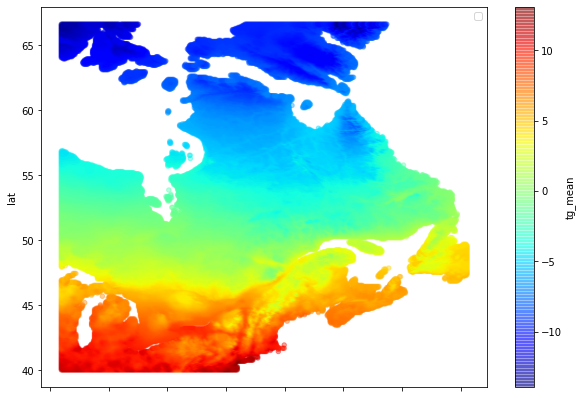

In [11]:
df_h.plot(kind="scatter", x="lon", y="lat",
    c="tg_mean", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

# Period 2040-2070

In [12]:
df2050 = dfp.query("time==1.0")
df2050 = df2050.reset_index()
df2050

,time,lat,lon,tg_mean
0,1.0,40.041039,-89.045212,13.880927
1,1.0,40.041039,-88.961884,13.860847
2,1.0,40.041039,-88.878548,13.849320
3,1.0,40.041039,-88.795219,13.825986
4,1.0,40.041039,-88.711891,13.843284
...,...,...,...,...
76201,1.0,66.623306,-61.629639,-7.526189
76202,1.0,66.623306,-61.546310,-7.831767
76203,1.0,66.623306,-61.462978,-7.619788
76204,1.0,66.623306,-61.379650,-7.545265


# Period 2071-20100

In [13]:
df2080 = dfp.query("time==2.0")
df2080 = df2080.reset_index()
df2080

,time,lat,lon,tg_mean
0,2.0,40.041039,-89.045212,14.543394
1,2.0,40.041039,-88.961884,14.523819
2,2.0,40.041039,-88.878548,14.512645
3,2.0,40.041039,-88.795219,14.490088
4,2.0,40.041039,-88.711891,14.509305
...,...,...,...,...
76201,2.0,66.623306,-61.629639,-6.771683
76202,2.0,66.623306,-61.546310,-7.084950
76203,2.0,66.623306,-61.462978,-6.876992
76204,2.0,66.623306,-61.379650,-6.807693


# Clipping by region

In [14]:
%time latlon_df = pcdf.latlon_regions(shapefile)

/home/mlopez/EXEC/anaconda3/envs/python37-2/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  warn(


CPU times: user 1min 24s, sys: 5.64 s, total: 1min 30s
Wall time: 57.1 s


In [15]:
latlon_df.head()

,lat,lon,geometry,index_right,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL
68495,52.957191,-66.462784,POINT (-66.46278 52.95719),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est
68496,52.957191,-66.379448,POINT (-66.37945 52.95719),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est
68869,52.873859,-69.962639,POINT (-69.96264 52.87386),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est
68870,52.873859,-69.879311,POINT (-69.87931 52.87386),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est
68871,52.873859,-69.795982,POINT (-69.79598 52.87386),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est


In [16]:
df_h.set_index(["lat","lon"])

time    tg_mean
lat       lon                        
40.041039 -89.045212   0.0  11.474038
          -88.961884   0.0  11.452959
          -88.878548   0.0  11.440704
          -88.795219   0.0  11.419402
          -88.711891   0.0  11.434692
...                    ...        ...
66.623306 -61.629639   0.0  -9.656209
          -61.546310   0.0  -9.948932
          -61.462978   0.0  -9.735876
          -61.379650   0.0  -9.655593
          -61.296322   0.0  -9.051710

[76206 rows x 2 columns]

In [17]:
latlon_df.set_index(["lat","lon"])

geometry  index_right  OBJECTID  \
lat       lon                                                             
52.957191 -66.462784  POINT (-66.46278 52.95719)            7         8   
          -66.379448  POINT (-66.37945 52.95719)            7         8   
52.873859 -69.962639  POINT (-69.96264 52.87386)            7         8   
          -69.879311  POINT (-69.87931 52.87386)            7         8   
          -69.795982  POINT (-69.79598 52.87386)            7         8   
...                                          ...          ...       ...   
45.041668 -71.875000  POINT (-71.87500 45.04167)            4         5   
          -71.791672  POINT (-71.79167 45.04167)            4         5   
          -71.708336  POINT (-71.70834 45.04167)            4         5   
          -71.625000  POINT (-71.62500 45.04167)            4         5   
          -71.541672  POINT (-71.54167 45.04167)            4         5   

                     NO_REG_FOR                        NM_REG_FOR  \
lat       lon                                                       
52.957191 -66.462784         09                         COTE-NORD   
          -66.379448         09                         COTE-NORD   
52.873859 -69.962639         09                         COTE-NORD   
          -69.879311         09                         COTE-NORD   
          -69.795982         09                         COTE-NORD   
...                         ...                               ...   
45.041668 -71.875000         05  ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL   
          -71.791672         05  ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL   
          -71.708336         05  ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL   
          -71.625000         05  ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL   
          -71.541672         05  ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL   

                          NO_UG_RAF   SUP_KM2  DATE_PUBLI    Shape_Leng  \
lat       lon                                                             
52.957191 -66.462784  093, 094, 097  379435.8  2019-11-30  5.360494e+06   
          -66.379448  093, 094, 097  379435.8  2019-11-30  5.360494e+06   
52.873859 -69.962639  093, 094, 097  379435.8  2019-11-30  5.360494e+06   
          -69.879311  093, 094, 097  379435.8  2019-11-30  5.360494e+06   
          -69.795982  093, 094, 097  379435.8  2019-11-30  5.360494e+06   
...                             ...       ...         ...           ...   
45.041668 -71.875000       051, 052   23252.3  2019-11-30  1.123268e+06   
          -71.791672       051, 052   23252.3  2019-11-30  1.123268e+06   
          -71.708336       051, 052   23252.3  2019-11-30  1.123268e+06   
          -71.625000       051, 052   23252.3  2019-11-30  1.123268e+06   
          -71.541672       051, 052   23252.3  2019-11-30  1.123268e+06   

                        Shape_Area                     D_GENERAL  
lat       lon                                                     
52.957191 -66.462784  3.744732e+11                      Nord-est  
          -66.379448  3.744732e+11                      Nord-est  
52.873859 -69.962639  3.744732e+11                      Nord-est  
          -69.879311  3.744732e+11                      Nord-est  
          -69.795982  3.744732e+11                      Nord-est  
...                            ...                           ...  
45.041668 -71.875000  2.330905e+10  Secteur métropolitain et sud  
          -71.791672  2.330905e+10  Secteur métropolitain et sud  
          -71.708336  2.330905e+10  Secteur métropolitain et sud  
          -71.625000  2.330905e+10  Secteur métropolitain et sud  
          -71.541672  2.330905e+10  Secteur métropolitain et sud  

[35603 rows x 11 columns]

In [18]:
dfTG2 = pd.merge(df_h, latlon_df, on=["lat","lon"])

In [19]:
dfTG2.head()

,time,lat,lon,tg_mean,geometry,index_right,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL
0,0.0,45.04084,-74.545792,6.868199,POINT (-74.54579 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
1,0.0,45.04084,-74.462463,6.846121,POINT (-74.46246 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
2,0.0,45.04084,-74.379128,6.829494,POINT (-74.37913 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
3,0.0,45.04084,-74.295799,6.825626,POINT (-74.29580 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
4,0.0,45.04084,-74.212471,6.855413,POINT (-74.21247 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud


In [20]:
dfrf = dfTG2.drop(columns=["NO_UG_RAF", "SUP_KM2", "DATE_PUBLI", "Shape_Leng", "Shape_Area", "D_GENERAL"])
dfrf.loc[(dfrf.NM_REG_FOR == "ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL"),"NM_REG_FOR"]="Estrie-Montérégie-Laval-Montréal"
dfrf.loc[(dfrf.NM_REG_FOR == "BAS-SAINT-LAURENT"),"NM_REG_FOR"]="Bas-Saint-Laurent"
dfrf.loc[(dfrf.NM_REG_FOR == "SAGUENAY -LAC-SAINT-JEAN"),"NM_REG_FOR"]="Saguenay -Lac-Saint-Jean"
dfrf.loc[(dfrf.NM_REG_FOR == "CAPITALE-NATIONALE-CHAUDIÈRE-APPALACHES"),"NM_REG_FOR"]="Capitale-Nationale-Chaudière-Appalaches"
dfrf.loc[(dfrf.NM_REG_FOR == "MAURICIE-CENTRE-DU-QUÉBEC"),"NM_REG_FOR"]="Mauricie-Centre-Du-Québec"
dfrf.loc[(dfrf.NM_REG_FOR == "OUTAOUAIS"),"NM_REG_FOR"]="Outaouais"
dfrf.loc[(dfrf.NM_REG_FOR == "ABITIBI-TEMISCAMINGUE"),"NM_REG_FOR"]="Abitibi-Témiscamingue"
dfrf.loc[(dfrf.NM_REG_FOR == "COTE-NORD"),"NM_REG_FOR"]="Cote-Nord"
dfrf.loc[(dfrf.NM_REG_FOR == "NORD-DU-QUEBEC"),"NM_REG_FOR"]="Nord-Du-Québec"
dfrf.loc[(dfrf.NM_REG_FOR == "GASPESIE-ILES-DE-LA-MADELEINE"),"NM_REG_FOR"]="Gaspésie-Iles-De-La-Madeleine"
dfrf.loc[(dfrf.NM_REG_FOR == "LANAUDIERE"),"NM_REG_FOR"]="Lanaudière"
dfrf.loc[(dfrf.NM_REG_FOR == "LAURENTIDES"),"NM_REG_FOR"]="Laurentides"


In [21]:
dfrf

,time,lat,lon,tg_mean,geometry,index_right,OBJECTID,NO_REG_FOR,NM_REG_FOR
0,0.0,45.040840,-74.545792,6.868199,POINT (-74.54579 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
1,0.0,45.040840,-74.462463,6.846121,POINT (-74.46246 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
2,0.0,45.040840,-74.379128,6.829494,POINT (-74.37913 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
3,0.0,45.040840,-74.295799,6.825626,POINT (-74.29580 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
4,0.0,45.040840,-74.212471,6.855413,POINT (-74.21247 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
...,...,...,...,...,...,...,...,...,...
15530,0.0,52.873859,-62.629601,-2.324701,POINT (-62.62960 52.87386),7,8,09,Cote-Nord
15531,0.0,52.873859,-62.546268,-2.353802,POINT (-62.54627 52.87386),7,8,09,Cote-Nord
15532,0.0,52.873859,-62.462940,-2.413770,POINT (-62.46294 52.87386),7,8,09,Cote-Nord
15533,0.0,52.957191,-66.462784,-2.928045,POINT (-66.46278 52.95719),7,8,09,Cote-Nord


In [22]:
dfTG3 = dfrf.pivot("lat", "lon", "tg_mean")

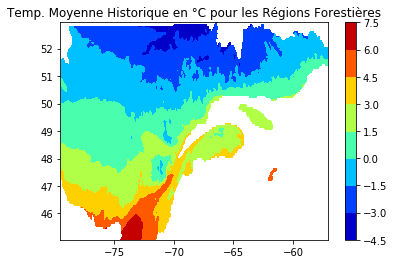

In [23]:
plt.contourf(dfTG3.columns, dfTG3.index, dfTG3.values,
                cmap= "jet")
plt.title("Temp. Moyenne Historique en °C pour les Régions Forestières")
plt.colorbar()
plt.savefig("Toutes les RégionsMoyenne_Annuel_Hist_Moderees.png")

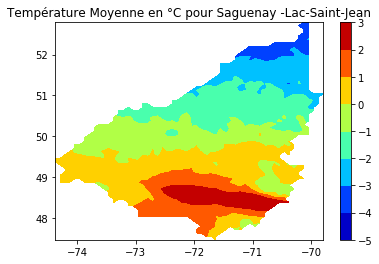

In [24]:
for (NM_REG_FOR, df) in dfrf.groupby("NM_REG_FOR"):
    plt.clf()
    df2 = df.pivot("lat", "lon", "tg_mean")
    plt.contourf(df2.columns, df2.index, df2.values,
                cmap= "jet")
    plt.title("Température Moyenne en °C pour "+NM_REG_FOR)
    plt.colorbar()
    #plt.show()
    plt.savefig(NM_REG_FOR+"Moyenne_Annuel_Hist_Moderees.png")

# For Period 2040-2070

In [25]:
df2050.set_index(["lat","lon"])

time    tg_mean
lat       lon                        
40.041039 -89.045212   1.0  13.880927
          -88.961884   1.0  13.860847
          -88.878548   1.0  13.849320
          -88.795219   1.0  13.825986
          -88.711891   1.0  13.843284
...                    ...        ...
66.623306 -61.629639   1.0  -7.526189
          -61.546310   1.0  -7.831767
          -61.462978   1.0  -7.619788
          -61.379650   1.0  -7.545265
          -61.296322   1.0  -6.941467

[76206 rows x 2 columns]

In [26]:
dfTG2050 = pd.merge(df2050, latlon_df, on=["lat","lon"])
dfTG2050.head()

,time,lat,lon,tg_mean,geometry,index_right,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL
0,1.0,45.04084,-74.545792,9.523340,POINT (-74.54579 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
1,1.0,45.04084,-74.462463,9.506913,POINT (-74.46246 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
2,1.0,45.04084,-74.379128,9.496275,POINT (-74.37913 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
3,1.0,45.04084,-74.295799,9.496484,POINT (-74.29580 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
4,1.0,45.04084,-74.212471,9.526042,POINT (-74.21247 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud


In [27]:
dfrf50 = dfTG2050.drop(columns=["NO_UG_RAF", "SUP_KM2", "DATE_PUBLI", "Shape_Leng", "Shape_Area", "D_GENERAL"])
dfrf50

,time,lat,lon,tg_mean,geometry,index_right,OBJECTID,NO_REG_FOR,NM_REG_FOR
0,1.0,45.040840,-74.545792,9.523340,POINT (-74.54579 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL
1,1.0,45.040840,-74.462463,9.506913,POINT (-74.46246 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL
2,1.0,45.040840,-74.379128,9.496275,POINT (-74.37913 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL
3,1.0,45.040840,-74.295799,9.496484,POINT (-74.29580 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL
4,1.0,45.040840,-74.212471,9.526042,POINT (-74.21247 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL
...,...,...,...,...,...,...,...,...,...
15530,1.0,52.873859,-62.629601,0.410862,POINT (-62.62960 52.87386),7,8,09,COTE-NORD
15531,1.0,52.873859,-62.546268,0.376429,POINT (-62.54627 52.87386),7,8,09,COTE-NORD
15532,1.0,52.873859,-62.462940,0.309776,POINT (-62.46294 52.87386),7,8,09,COTE-NORD
15533,1.0,52.957191,-66.462784,0.001904,POINT (-66.46278 52.95719),7,8,09,COTE-NORD


In [28]:
dfrf50.loc[(dfrf50.NM_REG_FOR == "ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL"),"NM_REG_FOR"]="Estrie-Montérégie-Laval-Montréal"
dfrf50

,time,lat,lon,tg_mean,geometry,index_right,OBJECTID,NO_REG_FOR,NM_REG_FOR
0,1.0,45.040840,-74.545792,9.523340,POINT (-74.54579 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
1,1.0,45.040840,-74.462463,9.506913,POINT (-74.46246 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
2,1.0,45.040840,-74.379128,9.496275,POINT (-74.37913 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
3,1.0,45.040840,-74.295799,9.496484,POINT (-74.29580 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
4,1.0,45.040840,-74.212471,9.526042,POINT (-74.21247 45.04084),4,5,05,Estrie-Montérégie-Laval-Montréal
...,...,...,...,...,...,...,...,...,...
15530,1.0,52.873859,-62.629601,0.410862,POINT (-62.62960 52.87386),7,8,09,COTE-NORD
15531,1.0,52.873859,-62.546268,0.376429,POINT (-62.54627 52.87386),7,8,09,COTE-NORD
15532,1.0,52.873859,-62.462940,0.309776,POINT (-62.46294 52.87386),7,8,09,COTE-NORD
15533,1.0,52.957191,-66.462784,0.001904,POINT (-66.46278 52.95719),7,8,09,COTE-NORD


In [29]:

dfrf50.loc[(dfrf50.NM_REG_FOR == "BAS-SAINT-LAURENT"),"NM_REG_FOR"]="Bas-Saint-Laurent"
dfrf50.loc[(dfrf50.NM_REG_FOR == "SAGUENAY -LAC-SAINT-JEAN"),"NM_REG_FOR"]="Saguenay -Lac-Saint-Jean"
dfrf50.loc[(dfrf50.NM_REG_FOR == "CAPITALE-NATIONALE-CHAUDIÈRE-APPALACHES"),"NM_REG_FOR"]="Capitale-Nationale-Chaudière-Appalaches"
dfrf50.loc[(dfrf50.NM_REG_FOR == "MAURICIE-CENTRE-DU-QUÉBEC"),"NM_REG_FOR"]="Mauricie-Centre-Du-Québec"
dfrf50.loc[(dfrf50.NM_REG_FOR == "OUTAOUAIS"),"NM_REG_FOR"]="Outaouais"
dfrf50.loc[(dfrf50.NM_REG_FOR == "ABITIBI-TEMISCAMINGUE"),"NM_REG_FOR"]="Abitibi-Témiscamingue"
dfrf50.loc[(dfrf50.NM_REG_FOR == "COTE-NORD"),"NM_REG_FOR"]="Cote-Nord"
dfrf50.loc[(dfrf50.NM_REG_FOR == "NORD-DU-QUEBEC"),"NM_REG_FOR"]="Nord-Du-Québec"
dfrf50.loc[(dfrf50.NM_REG_FOR == "GASPESIE-ILES-DE-LA-MADELEINE"),"NM_REG_FOR"]="Gaspésie-Iles-De-La-Madeleine"
dfrf50.loc[(dfrf50.NM_REG_FOR == "LANAUDIERE"),"NM_REG_FOR"]="Lanaudière"
dfrf50.loc[(dfrf50.NM_REG_FOR == "LAURENTIDES"),"NM_REG_FOR"]="Laurentides"

In [30]:
df2050p = dfrf50.pivot("lat", "lon", "tg_mean")

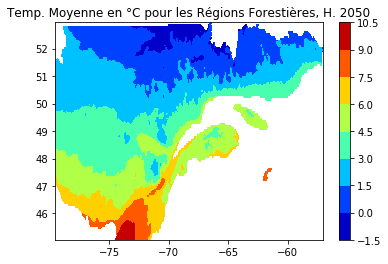

In [31]:
plt.contourf(df2050p.columns, df2050p.index, df2050p.values,
                cmap= "jet")
plt.title("Temp. Moyenne en °C pour les Régions Forestières, H. 2050")

plt.colorbar()
plt.savefig("Toutes les RégionsMoyenne_Annuel_2050_Moderees.png")

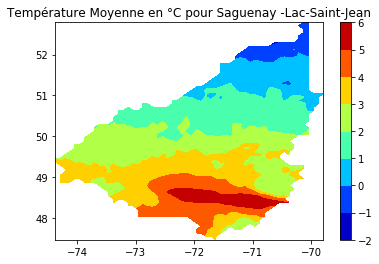

In [32]:
for (NM_REG_FOR, df) in dfrf50.groupby("NM_REG_FOR"):
    plt.clf()
    df2 = df.pivot("lat", "lon", "tg_mean")
    plt.contourf(df2.columns, df2.index, df2.values,
                cmap= "jet")
    plt.title("Température Moyenne en °C pour "+NM_REG_FOR)
    plt.colorbar()
    #plt.show()
    plt.savefig(NM_REG_FOR+"Moyenne_Annuel_2050_Moderees.png")

# For Period 2071-2100

In [33]:
df2080.set_index(["lat","lon"])

time    tg_mean
lat       lon                        
40.041039 -89.045212   2.0  14.543394
          -88.961884   2.0  14.523819
          -88.878548   2.0  14.512645
          -88.795219   2.0  14.490088
          -88.711891   2.0  14.509305
...                    ...        ...
66.623306 -61.629639   2.0  -6.771683
          -61.546310   2.0  -7.084950
          -61.462978   2.0  -6.876992
          -61.379650   2.0  -6.807693
          -61.296322   2.0  -6.205523

[76206 rows x 2 columns]

In [34]:
dfTG2080 = pd.merge(df2080, latlon_df, on=["lat","lon"])
dfTG2080

,time,lat,lon,tg_mean,geometry,index_right,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL
0,2.0,45.040840,-74.545792,10.223314,POINT (-74.54579 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
1,2.0,45.040840,-74.462463,10.207400,POINT (-74.46246 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
2,2.0,45.040840,-74.379128,10.196888,POINT (-74.37913 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
3,2.0,45.040840,-74.295799,10.195649,POINT (-74.29580 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
4,2.0,45.040840,-74.212471,10.223697,POINT (-74.21247 45.04084),4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15530,2.0,52.873859,-62.629601,0.833838,POINT (-62.62960 52.87386),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est
15531,2.0,52.873859,-62.546268,0.803015,POINT (-62.54627 52.87386),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est
15532,2.0,52.873859,-62.462940,0.737890,POINT (-62.46294 52.87386),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est
15533,2.0,52.957191,-66.462784,0.323107,POINT (-66.46278 52.95719),7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est


In [35]:
dfrf80 = dfTG2080.drop(columns=["NO_UG_RAF", "SUP_KM2", "DATE_PUBLI", "Shape_Leng", "Shape_Area", "D_GENERAL"])
dfrf80.loc[(dfrf80.NM_REG_FOR == "ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL"),"NM_REG_FOR"]="Estrie-Montérégie-Laval-Montréal"
dfrf80.loc[(dfrf80.NM_REG_FOR == "BAS-SAINT-LAURENT"),"NM_REG_FOR"]="Bas-Saint-Laurent"
dfrf80.loc[(dfrf80.NM_REG_FOR == "SAGUENAY -LAC-SAINT-JEAN"),"NM_REG_FOR"]="Saguenay -Lac-Saint-Jean"
dfrf80.loc[(dfrf80.NM_REG_FOR == "CAPITALE-NATIONALE-CHAUDIÈRE-APPALACHES"),"NM_REG_FOR"]="Capitale-Nationale-Chaudière-Appalaches"
dfrf80.loc[(dfrf80.NM_REG_FOR == "MAURICIE-CENTRE-DU-QUÉBEC"),"NM_REG_FOR"]="Mauricie-Centre-Du-Québec"
dfrf80.loc[(dfrf80.NM_REG_FOR == "OUTAOUAIS"),"NM_REG_FOR"]="Outaouais"
dfrf80.loc[(dfrf80.NM_REG_FOR == "ABITIBI-TEMISCAMINGUE"),"NM_REG_FOR"]="Abitibi-Témiscamingue"
dfrf80.loc[(dfrf80.NM_REG_FOR == "COTE-NORD"),"NM_REG_FOR"]="Cote-Nord"
dfrf80.loc[(dfrf80.NM_REG_FOR == "NORD-DU-QUEBEC"),"NM_REG_FOR"]="Nord-Du-Québec"
dfrf80.loc[(dfrf80.NM_REG_FOR == "GASPESIE-ILES-DE-LA-MADELEINE"),"NM_REG_FOR"]="Gaspésie-Iles-De-La-Madeleine"
dfrf80.loc[(dfrf80.NM_REG_FOR == "LANAUDIERE"),"NM_REG_FOR"]="Lanaudière"
dfrf80.loc[(dfrf80.NM_REG_FOR == "LAURENTIDES"),"NM_REG_FOR"]="Laurentides"

In [36]:
df2080p = dfrf80.pivot("lat", "lon", "tg_mean")

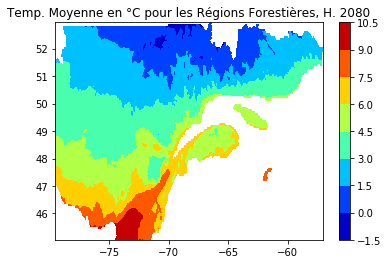

In [37]:
plt.contourf(df2080p.columns, df2080p.index, df2080p.values,
                cmap= "jet")
plt.title("Temp. Moyenne en °C pour les Régions Forestières, H. 2080")

plt.colorbar()
plt.savefig("Toutes les RégionsMoyenne_Annuel_2080_Moderees.png")

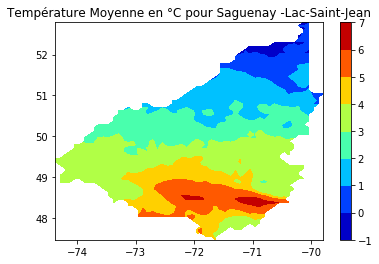

In [38]:
for (NM_REG_FOR, df) in dfrf80.groupby("NM_REG_FOR"):
    plt.clf()
    df2 = df.pivot("lat", "lon", "tg_mean")
    plt.contourf(df2.columns, df2.index, df2.values,
                cmap= "jet")
    plt.title("Température Moyenne en °C pour "+NM_REG_FOR)
    plt.colorbar()
    #plt.show()
    plt.savefig(NM_REG_FOR+"Moyenne_Annuel_2080_Moderees.png")